In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import warnings

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('../dados_processados/cursos-pos-processamento.csv',sep=';')

In [4]:
X.shape

(3205, 37)

In [5]:
X.columns

Index(['no_cine_area_geral_artes_e_humanidades',
       'no_cine_area_geral_ciencias_naturais,_matematica_e_estatistica',
       'no_cine_area_geral_ciencias_sociais,_comunicacao_e_informacao',
       'no_cine_area_geral_computacao_e_tecnologias_da_informacao_e_comunicacao_(tic)',
       'no_cine_area_geral_educacao', 'no_cine_area_geral_saude_e_bem-estar',
       'tp_grau_academico_bacharelado', 'tp_grau_academico_licenciatura',
       'tp_grau_academico_tecnologico', 'enade_faixa_1.5', 'enade_faixa_2.0',
       'enade_faixa_3.0', 'enade_faixa_4.0', 'enade_faixa_5.0',
       'cpc_faixa_1.5', 'cpc_faixa_2.0', 'cpc_faixa_3.0', 'cpc_faixa_4.0',
       'cpc_faixa_5.0', 'qt_vg_total', 'qt_vg_remanesc', 'qt_inscrito_total',
       'qt_insc_vg_remanesc', 'qt_ing_preta', 'qt_ing_amarela', 'qt_ing_cornd',
       'qt_conc', 'qt_ing_deficiente', 'qt_ing_reserva_vaga',
       'qt_sit_trancada', 'qt_sit_desvinculado', 'qt_ing_procescprivada',
       'qt_apoio_social', 'qt_conc_apoio_social', 'qt_a

In [6]:
X_to_train = X.drop(['no_curso','co_curso'],axis=1)

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=100)
kmeans.fit(X_to_train)

KMeans(n_clusters=5, n_init=100, random_state=42)

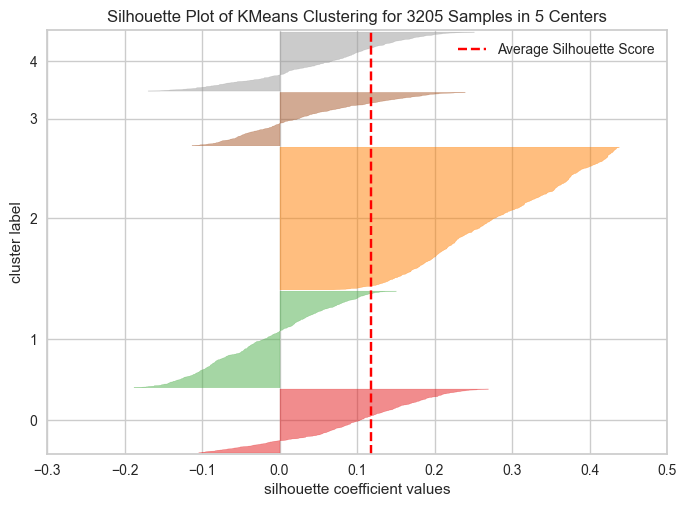

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3205 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X_to_train)
visualizer.show()

In [9]:
X_to_train['label'] = kmeans.labels_

In [10]:
X_to_train['no_curso'] = X['no_curso']

In [11]:
X_to_train

,no_cine_area_geral_artes_e_humanidades,"no_cine_area_geral_ciencias_naturais,_matematica_e_estatistica","no_cine_area_geral_ciencias_sociais,_comunicacao_e_informacao",no_cine_area_geral_computacao_e_tecnologias_da_informacao_e_comunicacao_(tic),no_cine_area_geral_educacao,no_cine_area_geral_saude_e_bem-estar,tp_grau_academico_bacharelado,tp_grau_academico_licenciatura,tp_grau_academico_tecnologico,enade_faixa_1.5,enade_faixa_2.0,enade_faixa_3.0,enade_faixa_4.0,enade_faixa_5.0,cpc_faixa_1.5,cpc_faixa_2.0,cpc_faixa_3.0,cpc_faixa_4.0,cpc_faixa_5.0,qt_vg_total,qt_vg_remanesc,qt_inscrito_total,qt_insc_vg_remanesc,qt_ing_preta,qt_ing_amarela,qt_ing_cornd,qt_conc,qt_ing_deficiente,qt_ing_reserva_vaga,qt_sit_trancada,qt_sit_desvinculado,qt_ing_procescprivada,qt_apoio_social,qt_conc_apoio_social,qt_ativ_extracurricular,label,no_curso
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.005037,0.386979,-0.895389,1.063953,-0.935362,0.747183,0.676654,-0.084838,-0.543207,-0.546145,-0.273378,-1.000591,-0.141161,0.107162,-0.293097,2.423857,2,brasilia_licenciatura_artes_visuais
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.256279,-0.780552,-0.949700,-0.744330,-0.935362,-0.591772,-0.438060,-0.578089,-0.543207,-0.788694,-0.579909,-1.117724,-0.768070,-0.314139,-0.293097,0.529363,2,brasilia_licenciatura_artes_visuais
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.602910,-0.547046,2.279371,-0.356841,-0.935362,-0.591772,2.070048,2.052586,0.846240,2.283594,0.454630,-0.824890,1.948538,0.622085,-0.688540,2.559178,3,brasilia_bacharelado_ciencia_da_computacao
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.803903,-0.080033,0.200718,0.805627,-0.389879,-0.591772,2.070048,2.340316,-0.543207,1.636796,0.684528,-0.942024,1.635083,2.330693,2.277284,2.559178,4,brasilia_licenciatura_ciencias_biologicas
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.602910,-0.547046,2.279371,-0.227677,-0.662621,-0.591772,2.070048,2.340316,-0.543207,2.364443,-0.235062,-0.414921,2.366478,1.932798,1.288676,2.559178,3,brasilia_bacharelado_ciencias_biologicas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.502413,-0.780552,-0.307836,-0.744330,2.064791,0.747183,0.676654,2.340316,-0.543207,-0.869544,-0.541592,1.752057,1.530598,-0.829062,-0.688540,2.559178,1,sao_jose_licenciatura_pedagogia
3201,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.100567,0.386979,-0.110339,-0.227677,0.155603,0.747183,-0.716739,-0.742506,2.235687,0.424051,0.109784,0.170749,0.694719,1.043385,-0.293097,0.168507,1,sao_jose_licenciatura_quimica
3202,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.477430,-0.722175,0.299466,-0.615167,-0.935362,-0.591772,-0.716739,-0.906924,0.846240,0.100652,0.109784,-0.473488,-0.245646,-0.829062,-0.688540,-0.868953,2,tubarao_tecnologico_analise_e_desenvolvimento_...
3203,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.728530,2.079899,-0.757141,-0.744330,-0.389879,-0.591772,-0.438060,0.819457,-0.543207,-0.869544,2.217178,-0.239220,-0.559100,-0.454572,-0.688540,-0.011921,0,videira_bacharelado_ciencia_da_computacao


In [12]:
X_to_train.label.value_counts()

label
2    1100
1     745
0     493
4     455
3     412
Name: count, dtype: int64

In [13]:
for i in range(0, 5):
    cursos_cluster_i = list(X_to_train.query('label == @i')['no_curso'])
    print('Cluster', i+1, '-', len(cursos_cluster_i), 'cursos')
    
    for curso in cursos_cluster_i:
        print(curso)
    
    print()

Cluster 1 - 493 cursos
brasilia_bacharelado_design_-_programacao_visual
brasilia_bacharelado_geografia
brasilia_licenciatura_letras_-_lingua_inglesa_e_respectiva_literatura
brasilia_licenciatura_matematica
brasilia_licenciatura_matematica
anapolis_licenciatura_fisica
anapolis_bacharelado_ciencia_da_computacao
anapolis_licenciatura_ciencias_sociais
anapolis_licenciatura_quimica
formosa_licenciatura_ciencias_sociais
goias_licenciatura_filosofia
goias_bacharelado_filosofia
goias_licenciatura_artes_visuais
goiania_bacharelado_geografia
goiania_licenciatura_musica_-_instrumento_musical
goiania_licenciatura_fisica
jatai_licenciatura_fisica
jatai_licenciatura_letras_-_ingles
jatai_licenciatura_matematica
jatai_licenciatura_quimica
jatai_tecnologico_analise_e_desenvolvimento_de_sistemas
jatai_licenciatura_fisica
luziania_bacharelado_sistemas_de_informacao
minacu_licenciatura_pedagogia
mineiros_bacharelado_educacao_fisica
mineiros_licenciatura_pedagogia
mineiros_bacharelado_sistemas_de_informac